# Prediccion de valor de casas. (Problema bienes raices)

Este notebook se creara un modelo capaz de predecir los precios de algunos bienes inmuebles tomando en cuenta varias variables que determinaremos a continuacion. El dataset fue publicado en Kaggle https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

### Librerias utilizadas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos el data set (.cvs)

In [2]:
data_df = pd.read_csv('/content/kc_house_data.csv')
print(data_df.head(3))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 col

### Visualizacion de datos 

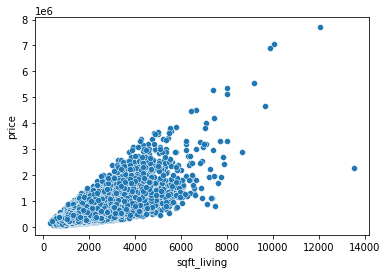

In [3]:
sns.scatterplot(x='sqft_living', y='price', data=data_df)

### Correlacion de datos
Al ser un dataset con bastantes variables debemos realizar otro tipo de grafico que nos ayude a visualizar en si cuales son las variables que poseen una mayor relacion.

### Mapa de calor

Los mapas de calor también son útiles para intentar comprender las relaciones entre múltiples variables. En este caso mientras mas se acerque a 1 el valor mas relacion tendra con esa variable.

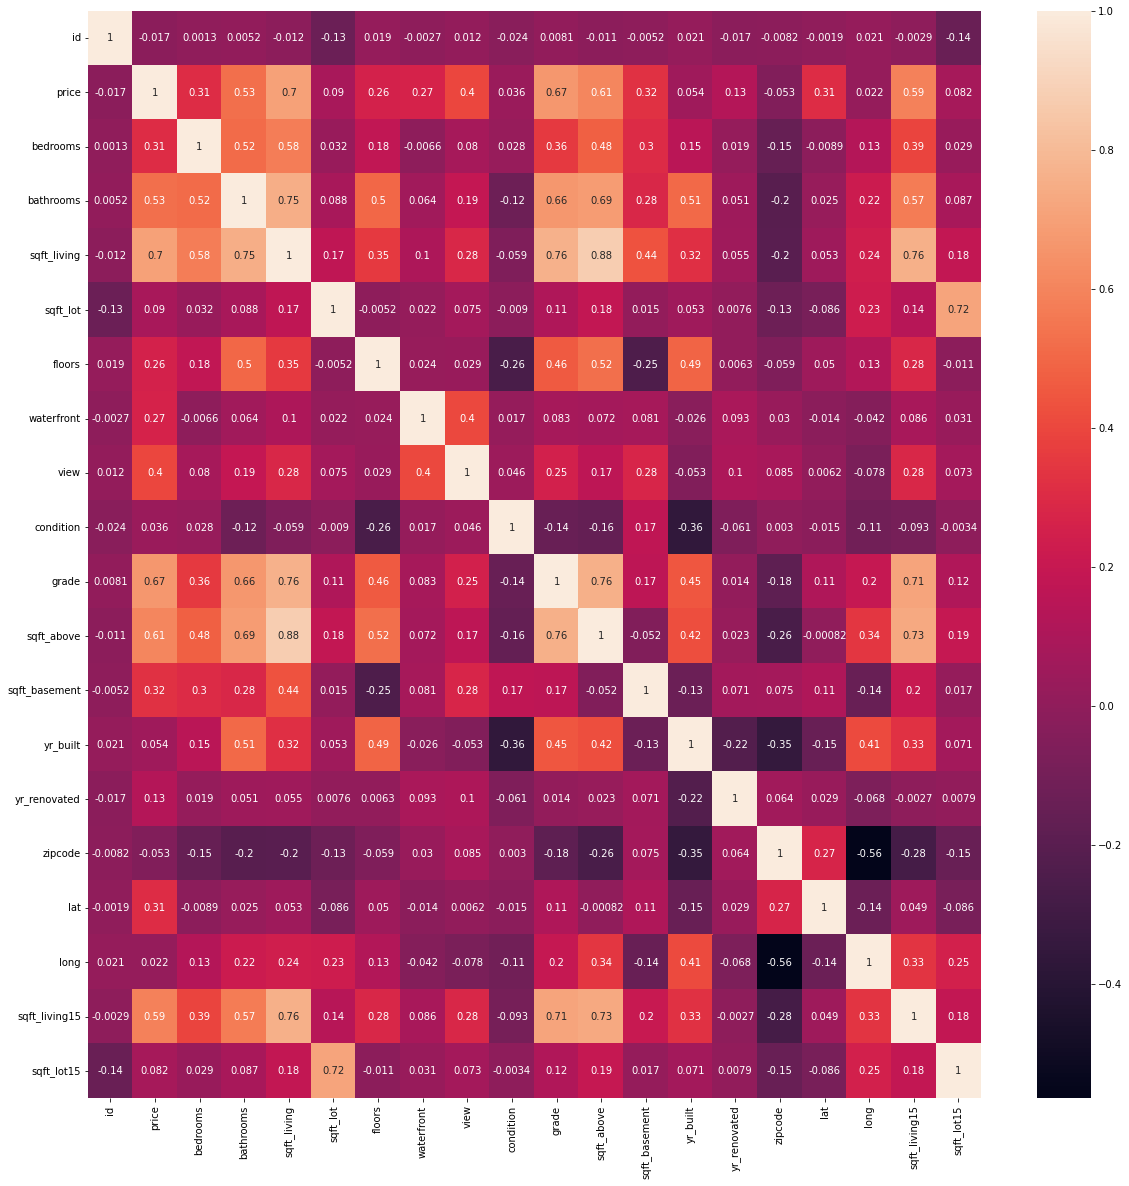

In [4]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), annot=True)

Como lo que buscamos es predecir un precio, nuestra salida sera 'price' y las de entrada seran aqueas variables que sean mayores a 0.30 ya que indican que tiene una relacion moderada, por ejemplo, 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'view', 'sqft_basement', 'lat'.

### Limpieza de datos

Unicamente utilizaremos los datos para pode predecir.

In [5]:
selected_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
X = data_df[selected_variables]
y = data_df['price']

### Escalado de datos

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

### Normalizando Salida (Precio)

In [9]:
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

### Entrenamiento del modelo

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

### Definiendo el modelo

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

model.add(tf.keras.layers.Dense(units=100, activation='linear'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               800       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
Total params: 21,000
Trainable params: 21,000
Non-trainable params: 0
_________________________________________________________________


### Compilando modelo

In [18]:
model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2)

Epoch 1/100
260/260 [==============================] - 2s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9334e-04 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 1s 3ms/step - loss: 9.8989e-04 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9002e-04 - val_loss: 0.0011
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 9.8434e-04 - val_loss: 0.0011
Epoch 10/100
260/260 [==============================] - 1s 3ms/step - loss:

### Grafico de aprendizaje

<ipython-input-19-bcbf3477e732>:6: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training loss', 'validation loss')
<ipython-input-19-bcbf3477e732>:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training loss', 'validation loss')
<ipython-input-19-bcbf3477e732>:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training loss', 'validation loss')
<ipython-input-19-bcbf3477e732>:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be use

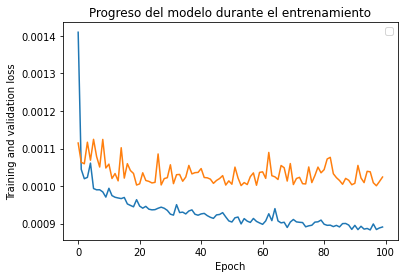

In [19]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Progreso del modelo durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.legend('Training loss', 'validation loss')

### Prediccion

 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'view', 'sqft_basement', 'lat'.

In [21]:
X_test1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])
scaler1 = MinMaxScaler()
X_test_scaled_1 = scaler1.fit_transform(X_test1)
X_test_scaled_1

array([[0., 0., 0., 0., 0., 0., 0.]])

In [22]:
y_predict1 = model.predict(X_test_scaled_1)
y_predict1

1/1 [==============================] - 0s 90ms/step


array([[0.02367505, 0.02311682, 0.02392482, 0.02488498, 0.02299625,
        0.02516408, 0.02312902, 0.02280546, 0.0234263 , 0.02429258,
        0.02445115, 0.0245104 , 0.02460069, 0.02460189, 0.02526622,
        0.02418376, 0.02359219, 0.02304771, 0.02520398, 0.02314669,
        0.02305622, 0.02496091, 0.02344197, 0.02444599, 0.02393479,
        0.02456925, 0.02257931, 0.02361126, 0.02296591, 0.02311024,
        0.02421963, 0.02421666, 0.02364729, 0.02415515, 0.02438651,
        0.02425448, 0.02458893, 0.02382044, 0.02404187, 0.02415082,
        0.02510957, 0.02468076, 0.02280479, 0.02407853, 0.02509265,
        0.02367675, 0.02314993, 0.02443596, 0.02475012, 0.02324785,
        0.02255555, 0.02455404, 0.02531568, 0.02354185, 0.02448087,
        0.0244308 , 0.02400873, 0.02414151, 0.02325471, 0.02394477,
        0.02371105, 0.02329089, 0.02386777, 0.02305892, 0.02486918,
        0.02388928, 0.02545618, 0.02391142, 0.02379067, 0.02384222,
        0.02308751, 0.02468224, 0.02437688, 0.02

In [25]:
result = scaler.inverse_transform(y_predict1)
result

array([[255522.27, 251265.78, 257426.77, 264747.94, 250346.39, 266876.1 ,
        251358.75, 248891.61, 253625.53, 260230.97, 261440.02, 261891.77,
        262580.28, 262589.44, 267654.94, 259401.16, 254890.42, 250738.81,
        267180.34, 251493.52, 250803.66, 265326.97, 253745.  , 261400.67,
        257502.77, 262340.53, 247167.23, 255035.89, 250115.06, 251215.56,
        259674.67, 259652.  , 255310.56, 259183.  , 260947.12, 259940.4 ,
        262490.56, 256630.88, 258319.23, 259150.  , 266460.47, 263190.84,
        248886.5 , 258598.83, 266331.47, 255535.25, 251518.22, 261324.2 ,
        263719.7 , 252264.83, 246986.03, 262224.53, 268032.06, 254506.61,
        261666.66, 261284.86, 258066.56, 259079.02, 252317.12, 257578.88,
        255796.72, 252593.03, 256991.77, 250824.31, 264627.5 , 257155.78,
        269103.34, 257324.6 , 256403.89, 256796.92, 251042.27, 263202.1 ,
        260873.75, 262128.92, 261701.05, 255882.9 , 255360.7 , 255592.4 ,
        260162.45, 262507.9 , 252750.7